# Final Project 

Dataset: https://www.kaggle.com/lodetomasi1995/income-classification
Every name has a space in front 

## Import packages and load data

In [46]:
import pandas as pd

import numpy as np
import time

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

from sklearn import svm
from sklearn import metrics
from sklearn import cluster

import matplotlib.pyplot as plt
import seaborn as sns
raw_data = pd.read_csv("income_evaluation.csv")

In [47]:
raw_data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


## Data Cleaning

strip all strings in the df as every one had a space in front


In [48]:
for col in raw_data.columns.tolist():
    if raw_data[col].dtype == 'O':
        raw_data[col] = raw_data[col].apply(str.strip)

#strip the column headers too
raw_data.columns = raw_data.columns.str.strip()

In [49]:
raw_data['native-country'] = raw_data['native-country'].apply(str.strip)
raw_data[raw_data['native-country'] == 'United-States']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


In [50]:
# strip all strings in the dataframe
for col in raw_data.columns.tolist():
    if raw_data[col].dtype == 'O':
        raw_data[col] = raw_data[col].apply(str.strip)



Drop missing data

In [51]:
orig_rows = raw_data.shape[0]

# drop nans
for col in raw_data.select_dtypes(include='O').columns:
    raw_data.drop(raw_data[raw_data[col] == '?'].index, axis=0, inplace=True)
print('Dropped ' + str(orig_rows - raw_data.shape[0]) + ' rows')

Dropped 2399 rows


### Pre-processing categrical data

##### Income >50k or not

In [52]:
income_one_hot = pd.get_dummies(raw_data['income'])
# Drop column native-country as it is now encoded
df = raw_data.drop('income',axis = 1)
# Join the encoded df
df = raw_data.join(income_one_hot)

##### Native Country
Keep those have more than 100 data points.

In [53]:
vc = df['native-country'].value_counts()
country_keep = vc[vc>100].index.tolist()
print(country_keep)

['United-States', 'Mexico', 'Philippines', 'Germany', 'Puerto-Rico', 'Canada']


In [54]:
df = df[raw_data['native-country'].isin(country_keep)]

In [56]:
country_one_hot = pd.get_dummies(df['native-country'])
# Drop column native-country as it is now encoded
df = df.drop('native-country',axis = 1)
# Join the encoded df
df = df.join(country_one_hot)

##### Education Level


In [57]:
def standardize_education(string):
    if string in ['Doctorate', 'Masters','Bachelors','HS-grad','Prof-school']:
        return string
    elif string in ['Some-college']:
        return 'colledge'
    elif string in ['Assoc-voc', 'Assoc-acdm']:
        return 'Assoc'
    else:
        return 'Basic'


In [58]:
df['education'] = df['education'].apply(standardize_education)


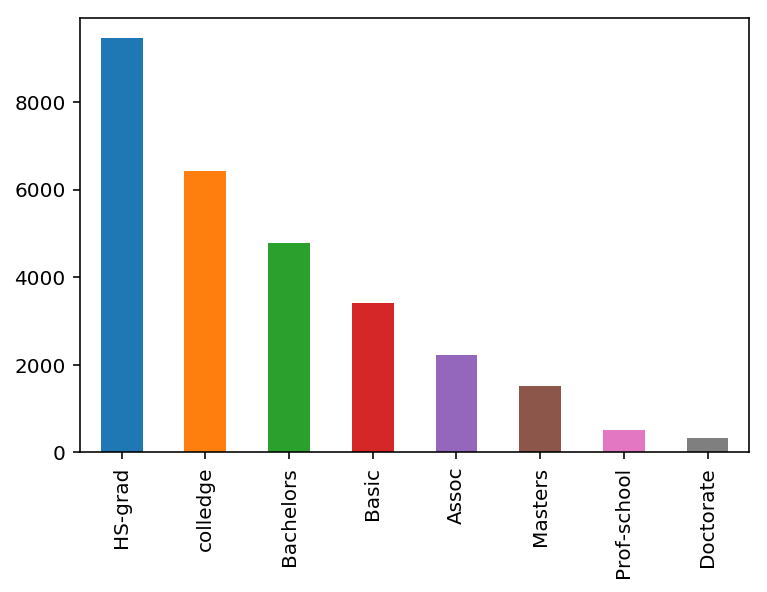

In [59]:
df['education'].value_counts().plot.bar()

In [60]:
edu_one_hot = pd.get_dummies(df['education'])
# Drop column education-country as it is now encoded
df = df.drop('education',axis = 1)
# Join the encoded df
df = df.join(edu_one_hot)

##### marital-status

In [61]:
# put Married-civ-spouse, Married-AF-spouse, Married-spouse-absent as all Married
# put Separated as Divorced
df['marital-status'] = df['marital-status'].replace({'Separated': 'Divorced', 'Married-civ-spouse': 'Married', 'Married-AF-spouse': 'Married', 'Married-spouse-absent': 'Married'})


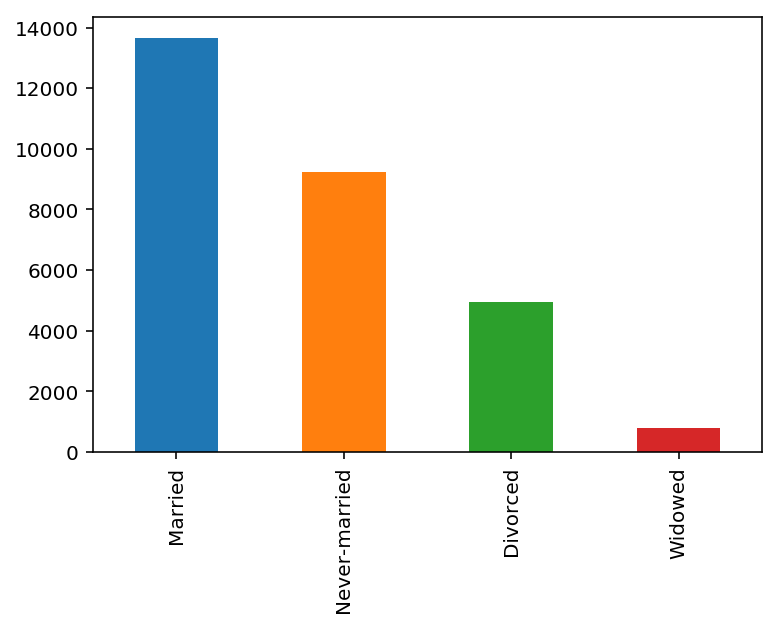

In [62]:
df['marital-status'].value_counts().plot.bar()

In [63]:
marital_one_hot = pd.get_dummies(df['marital-status'])
# Drop column marital as it is now encoded
df = df.drop('marital-status',axis = 1)
# Join the encoded df
df = df.join(marital_one_hot)

##### Relationship 

In [64]:
df['relationship'].value_counts()

Husband           11876
Not-in-family      7367
Own-child          4298
Unmarried          3034
Wife               1309
Other-relative      762
Name: relationship, dtype: int64

In [65]:
relationship_one_hot = pd.get_dummies(df['relationship'])
# Drop column relationship as it is now encoded
df = df.drop('relationship',axis = 1)
# Join the encoded df
df = df.join(relationship_one_hot)

##### workclass 

In [66]:
df['workclass'].value_counts()

Private             21104
Self-emp-not-inc     2367
Local-gov            2006
State-gov            1228
Self-emp-inc         1013
Federal-gov           914
Without-pay            14
Name: workclass, dtype: int64

In [67]:
#put self-emp-not-inc and self-emp-inc as self employed
df['workclass'] = df['workclass'].replace({'Self-emp-not-inc': 'Self-emp', 'Self-emp-inc': 'Self-emp', 'Federal-gov': 'gov','Local-gov': 'gov',
                                          'State-gov': 'gov', 'Federal-gov':'gov'})

In [68]:
workclass_one_hot = pd.get_dummies(df['workclass'])
# Drop column workclass as it is now encoded
df = df.drop('workclass',axis = 1)
# Join the encoded df
df = df.join(workclass_one_hot)

##### race 

In [69]:
df['race'].value_counts()

White                 25086
Black                  2649
Asian-Pac-Islander      456
Amer-Indian-Eskimo      282
Other                   173
Name: race, dtype: int64

In [70]:
race_one_hot = pd.get_dummies(df['race'])
# Drop column race as it is now encoded
df = df.drop('race',axis = 1)
# Join the encoded df
df = df.join(race_one_hot)

#### occupation

In [71]:
df['occupation'].value_counts()

Craft-repair         3842
Prof-specialty       3805
Exec-managerial      3804
Adm-clerical         3571
Sales                3448
Other-service        2971
Machine-op-inspct    1818
Transport-moving     1528
Handlers-cleaners    1276
Farming-fishing       968
Tech-support          874
Protective-serv       622
Priv-house-serv       110
Armed-Forces            9
Name: occupation, dtype: int64

In [72]:
occupation_one_hot = pd.get_dummies(df['occupation'])
# Drop column occupation as it is now encoded
df = df.drop('occupation',axis = 1)
# Join the encoded df
df = df.join(occupation_one_hot)

#### sex

In [73]:
sex_one_hot = pd.get_dummies(df['sex'])
# Drop column occupation as it is now encoded
df = df.drop('sex',axis = 1)
# Join the encoded df
df = df.join(sex_one_hot)

In [74]:
df.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,<=50K,>50K,Canada,...,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Female,Male
0,39,77516,13,2174,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,13,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Data Explore

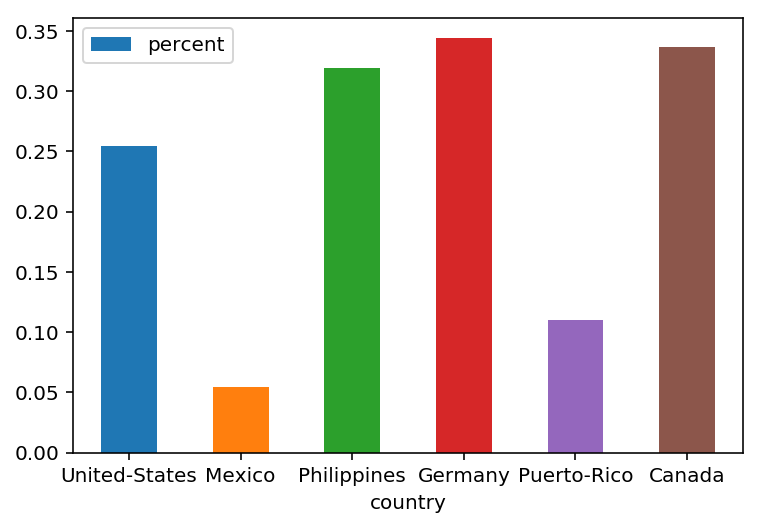

In [75]:
percent = []
for i in country_keep:
    percent.append(df[df[i] == 1]['>50K'].mean())
to_plot = pd.DataFrame({'country':country_keep, 'percent': percent})
to_plot.plot.bar(x='country', y='percent', rot=0)

it seems that people from western country has higher chance to have income greater than 50K

In [77]:
#sns.set_style('whitegrid')

#print(binary_data['education-num'].unique())

#plt.figure(figsize=(12,6))
#sns.distplot(a=binary_data['education-num'],bins=16,label='education years')
#plt.legend()
#plt.show()

In [78]:
#plt.figure(figsize=(12,6))
#plt.plot(x=binary_data['education-num'],y=['hour'])

In [79]:
#binary_data = binary_data.drop('education',axis=1)

In [80]:
#binary_data.head()

In [81]:
df['income'].head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
5    <=50K
Name: income, dtype: object

## Supervised

In [82]:
#shuffle and create train/test data
ml_df = df.sample(frac=1).reset_index(drop=True)
X = ml_df.drop(['<=50K', '>50K','income'],axis=1)
Y = ml_df['>50K']

# scale X data
scaler = StandardScaler()
X.iloc[:,:6] = scaler.fit_transform(X.iloc[:,:6])

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

/ext/anaconda5/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/ext/anaconda5/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### SVM

In [100]:
#reduce X_train, Y_train samples to speed up param search
print('X_train size: ' + str(X_train.shape) + ', Y_train size: ' + str(Y_train.shape))
X_train_short = X_train[:1000][:]
Y_train_short = Y_train[:1000][:]
print('X_train new size: ' + str(X_train_short.shape) + ', Y_train new size: ' + str(Y_train_short.shape))

X_train size: (22916, 55), Y_train size: (22916,)
X_train new size: (1000, 55), Y_train new size: (1000,)


In [101]:
clf = svm.SVC(gamma='scale')

kernel_list = ['linear','rbf']
#arbitrary
C_list = [10e-1, 10e0, 5, 10e1, 15, 10e2, 10e3]

# search for best params
# assume individual people are iid
clf = GridSearchCV(clf, {'C':C_list,'kernel':kernel_list}, cv=3, iid=True)
clf.fit(X_train_short,Y_train_short)

print('SVM Validation Accuracy: ' + str(clf.best_score_))
print(clf.best_params_)
best_C,best_kernel = clf.best_params_

KeyboardInterrupt: 

In [0]:
# fi classifier with best params, obtain accuracy metrics for predicted y
clf = svm.SVC(C=best_C, kernel=best_kernel, gamma='scale')
clf.fit(X_train,Y_train)

Y_hat = clf.predict(X_test)

precision,recall,fscore,support = metrics.precision_recall_fscore_support(y_true=Y_test,y_pred=Y_hat,average='binary')
test_acc = metrics.accuracy_score(Y_test,Y_hat)

In [0]:
print('SVM Test Accuracy: ' + str(test_acc))
print('SVM Precision: ' + str(precision))
print('SVM Recall: ' + str(recall))
print('SVM F Score: ' + str(fscore))

### Random Forest

In [0]:
clf = RandomForestClassifier(criterion='entropy')

# run gridsearchCV to find best params;
# first obtain possible max_features, 5 evenly spaced from 1 to |X_features|
max_feat_list = [1]
feat = int(X_train.shape[1]/5)
#feat can only extend to:              because of number of features in dataset 
while feat <= X_train.shape[1]:
    max_feat_list.append(feat)
    feat += int(X_train.shape[1]/5)

# now list of possible max_depths, estimators that I defined myself (arbitrarily)
# TODO: if this ends up being used, this parameter range must be adjusted to fit this problem (these were defined w/ regard to a diff. prob)
max_depth_list = [8,10,12,14,16]
estimator_list = [5,10,15,20,25]

#plug everything into 3-FOLD gridsearchCV and get best params, corresponding val_acc
clf = GridSearchCV(clf, {'n_estimators':estimator_list, 'max_features':max_feat_list, 'max_depth':max_depth_list}, 
                   cv=3, iid=True)
clf.fit(X_train, Y_train)
val_acc = clf.best_score_

#get best params
opt_depth, opt_features, opt_n_estimators = clf.best_params_.values()

print('RF Validation Accuracy: ' + str(val_acc))
print(clf.best_params_)

In [0]:
#plotting accuracy of RF over params
clf = RandomForestClassifier(criterion='entropy')

#calculating curves for param search
# number of estimators
train_scores,test_scores = validation_curve(clf, X_train, Y_train, param_name='n_estimators', param_range=estimator_list, cv=3, scoring='accuracy')
test_mean_est = np.mean(test_scores, axis=1)
train_mean_est = np.mean(train_scores, axis=1)

# max features to consider
train_scores,test_scores = validation_curve(clf, X_train, Y_train, param_name='max_features', param_range=max_feat_list, cv=3, scoring='accuracy')
test_mean_feat = np.mean(test_scores, axis=1)
train_mean_feat = np.mean(train_scores, axis=1)

# max depth to go down
train_scores,test_scores = validation_curve(clf, X_train, Y_train, param_name='max_depth', param_range=max_depth_list, cv=3, scoring='accuracy')
test_mean_depth = np.mean(test_scores, axis=1)
train_mean_depth = np.mean(train_scores, axis=1)

In [0]:
#now plot curves in order
plt.figure(figsize=(20,15))

plt.subplot(331)
plt.plot(estimator_list,train_mean_est,label='mean train acc')
plt.plot(estimator_list,test_mean_est,label='mean test acc')

plt.title('Accuracy Over Number of Estimators(Trees)')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(332)
plt.plot(max_feat_list,train_mean_feat,label='mean train acc')
plt.plot(max_feat_list,test_mean_feat,label='mean test acc')

plt.title('Accuracy Over Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(333)
plt.plot(max_depth_list,train_mean_depth,label='mean train acc')
plt.plot(max_depth_list,test_mean_depth,label='mean test acc')

plt.title('Accuracy Over Depth of Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

In [0]:
# fitting with best params
clf = RandomForestClassifier(criterion='entropy', max_depth=opt_depth, max_features=opt_features, n_estimators=100)
clf.fit(X_train,Y_train)
Y_hat = clf.predict(X_test)

#get accuracy metrics for best param fitting
test_acc = metrics.accuracy_score(Y_test,Y_hat)
precision,recall,fscore,support = metrics.precision_recall_fscore_support(y_true=Y_test,y_pred=Y_hat,average='binary')

In [0]:
print('RF Test Accuracy: ' + str(test_acc))
print('RF Precision: ' + str(precision))
print('RF Recall: ' + str(recall))
print('RF F Score: ' + str(fscore))

In [0]:
# a look at best features (features that were the most important in making the decision)
features_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
top_features = features_imp[:10]

#feature dict contains the top 10 features, with feature_name:feature_importance
feature_dict = {}
for feature_i in top_features.index.tolist():
    feat_name = ml_df.iloc[:,feature_i].name
    feature_dict[feat_name] = top_features[feature_i]

In [0]:
# plot the best features
plt.figure(figsize=(16,8))
plt.bar(x=feature_dict.keys(),height=feature_dict.values())
plt.title('Top 10 Features Used in Random Forests Classification for <=50k or >50k Income')
plt.xlabel('Feature')
plt.ylabel('Proportional Importance')
plt.show()

### PCA

In [33]:
#scale
X_train_scale = StandardScaler().fit_transform(X_train)
X_test_scale = StandardScaler().fit_transform(X_test)
#perform PCA
pca = PCA(0.95)
pca.fit(X_train_scale)
X_train_PCA = pca.fit_transform(X_train_scale)
X_test_PCA = pca.fit_transform(X_test_scale)
np.sum(pca.explained_variance_ratio_[0:10])

/ext/anaconda5/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/ext/anaconda5/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/ext/anaconda5/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/ext/anaconda5/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.2529640104798768

Text(0, 0.5, 'Explained Variance Ratio')

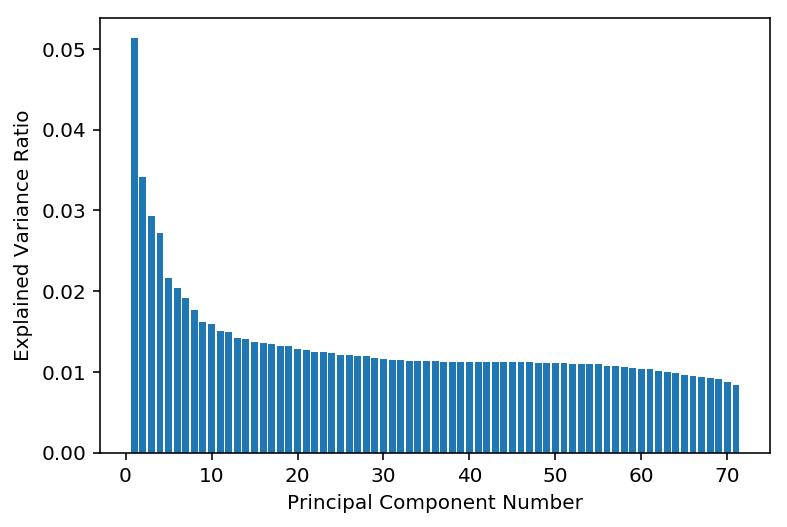

In [34]:
# plot the explained variance ratio for each principal component
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')

In [35]:
print(np.amax(abs( pca.components_[1,:] )))

0.46575080860609064


Text(0, 0.5, 'PC 2')

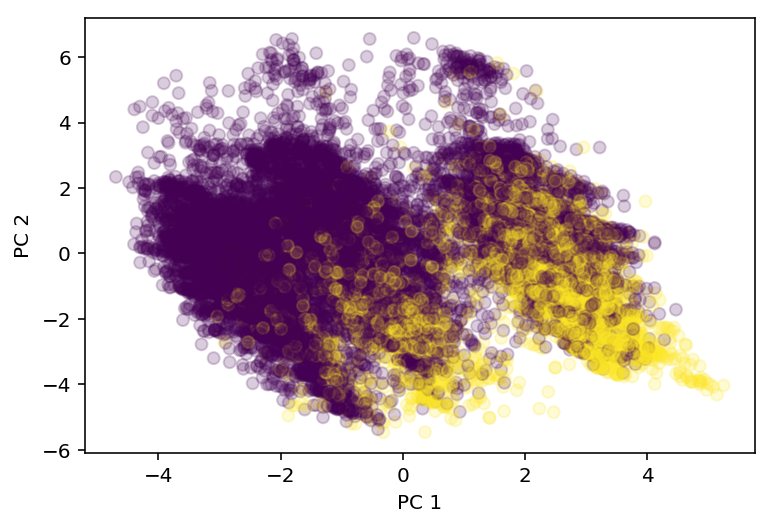

In [170]:
fig = plt.figure()
plt.scatter(X_train_PCA[:,0], X_train_PCA[:, 1], c=Y_train.values.T, alpha=0.2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# >50K yellow, <= 50K red

In [37]:
#code adapted from https://ostwalprasad.github.io/machine-learning/PCA-using-python.html
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(20,10))
    plt.scatter(xs * scalex,ys * scaley,c=Y_train.values.T, s=5)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center', bbox=props)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center', bbox=props)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [38]:
X_scaled

NameError: name 'X_scaled' is not defined

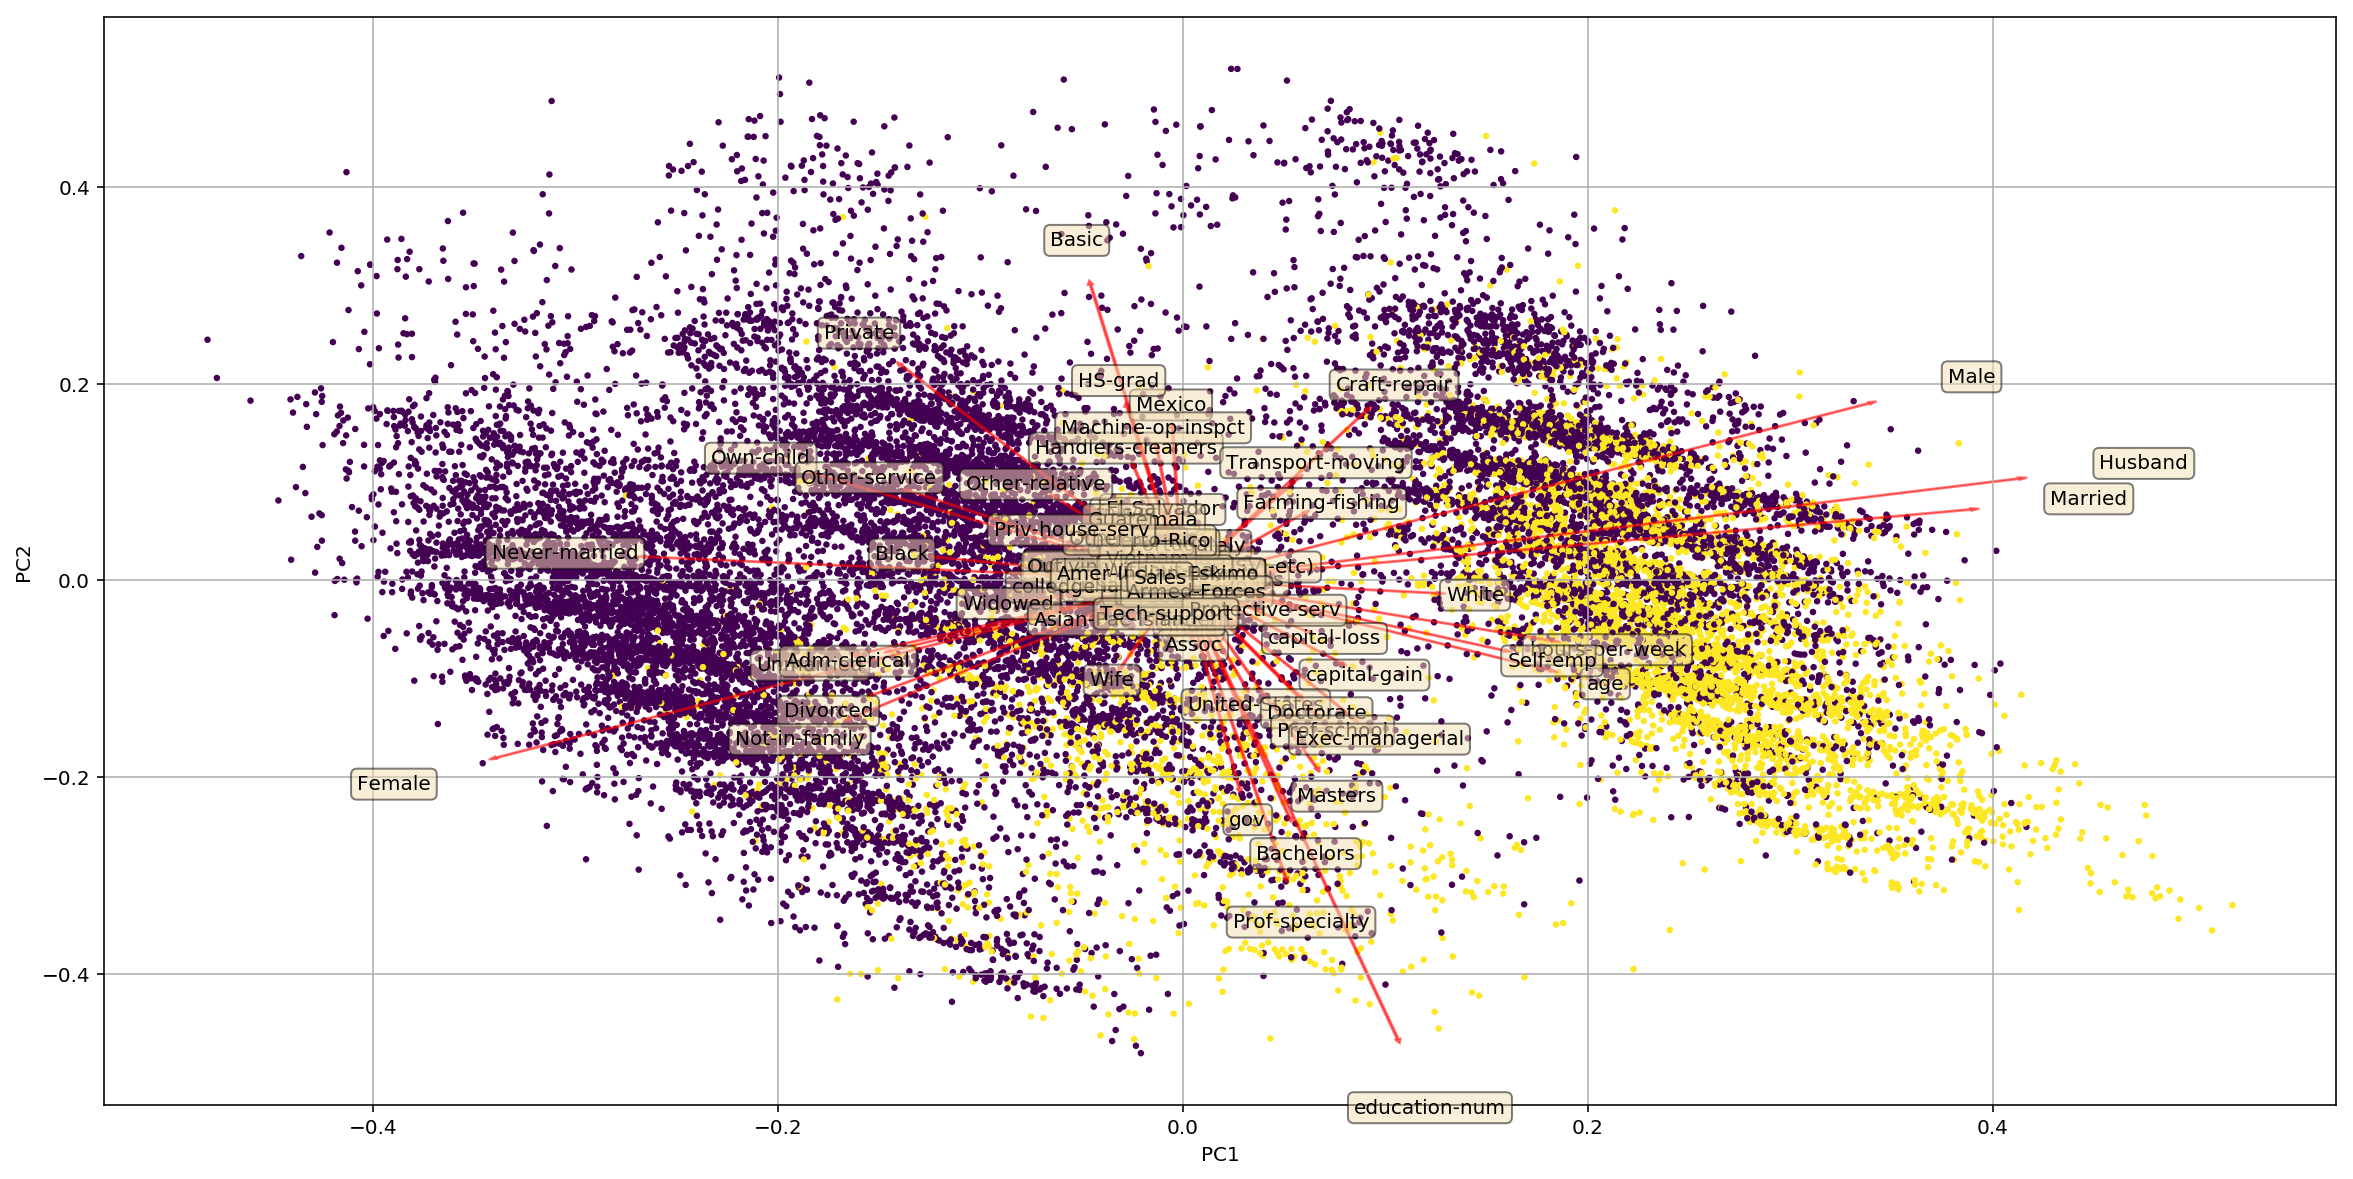

In [39]:
biplot(X_train_PCA[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.head()))
plt.show()

### K-Means (with and without PCA)

In [90]:
from sklearn.cluster import KMeans

In [91]:
# scale
X_train_scale = StandardScaler().fit_transform(X_train)
X_test_scale = StandardScaler().fit_transform(X_test)
#perform PCA
pca_20 = PCA(n_components=20)
pca_20.fit(X_train_scale)
X_train_PCA_20 = pca_20.fit_transform(X_train_scale)
X_test_PCA_20 = pca_20.transform(X_test_scale)
np.sum(pca_20.explained_variance_ratio_)

/ext/anaconda5/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/ext/anaconda5/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/ext/anaconda5/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/ext/anaconda5/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.6110409238941235

In [102]:
# try it for 20 PC's
test = np.zeros(10)
train = np.zeros(10)
for i in range(10):
    kmeans_20 = cluster.KMeans(n_clusters = 2)
    kmeans_20.fit(X_train_PCA_20, Y_train)
    kmeans_pred_20 = kmeans_20.predict(X_test_PCA_20)
    kmeans_pred_train = kmeans_20.predict(X_train_PCA_20)
    kmeans_score_train = metrics.accuracy_score(Y_train, kmeans_pred_train)
    kmeans_score_20 = metrics.accuracy_score(Y_test, kmeans_pred_20)
    test[i] = kmeans_score_20
    train[i] = kmeans_score_train

In [106]:
print(test)
print(train)

[0.29267016 0.29267016 0.70732984 0.70732984 0.29267016 0.29267016
 0.70732984 0.70732984 0.70732984 0.70732984]
[0.2882702 0.2882702 0.7117298 0.7117298 0.2882702 0.2882702 0.7117298
 0.7117298 0.7117298 0.7117298]


In [111]:
# do KMeans without PCA

for i in range(10):
    kmeans = cluster.KMeans(n_clusters = 2)
    kmeans.fit(X_train, Y_train)
    kmeans_pred_test = kmeans.predict(X_test)
    kmeans_pred_train = kmeans.predict(X_train)
    kmeans_score_train = metrics.accuracy_score(Y_train, kmeans_pred_train)
    kmeans_score_test = metrics.accuracy_score(Y_test, kmeans_pred_test)
    test[i] = kmeans_score_test
    train[i] = kmeans_score_train

In [117]:
print(test)
print(train)
print (np.mean([train[5],train[6], train[7]]))
print (np.mean([test[5],test[6], test[7]]))

[0.6895288  0.68726003 0.68726003 0.6895288  0.68726003 0.31273997
 0.31064572 0.31273997 0.68726003 0.68900524]
[0.69187467 0.68790365 0.68790365 0.69152557 0.68790365 0.31200908
 0.30816896 0.31179089 0.68790365 0.69122011]
0.3106563100017455
0.31204188481675393


### PCA to speed up LogisticRegression regression 

In [0]:
train_accuracy=[]
test_accuracy=[]
time_run=[]


In [0]:
for n in range(3,54):
    pca = PCA(n_components = n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    explained_variance = pca.explained_variance_ratio_

    start = time.time()
    classifier = LogisticRegression( C=1, max_iter = 100, solver='lbfgs', random_state=0)
    classifier.fit(X_train_pca, Y_train)
    score_train = classifier.score(X_train_pca, Y_train)
    score_test =  classifier.score(X_test_pca, Y_test)
    end = time.time()

    train_accuracy.append(score_train)
    test_accuracy.append(score_test)
    time_run.append(end - start)

In [0]:
logreg_pca = pd.DataFrame(list(zip(np.arange(3,54),train_accuracy, test_accuracy,time_run)),
                          columns =['components number','train_accuracy', 'test_accuracy','time(s)'])

In [0]:
logreg_pca['ave_accuracy'] = (logreg_pca['train_accuracy'] + logreg_pca['test_accuracy'])/2

In [0]:
logreg_pca

In [0]:
logreg_pca.plot(x='components number',y=['ave_accuracy','test_accuracy','train_accuracy'])

##### use 33 components 

In [135]:
time_pca=[]

In [136]:
pca = PCA(n_components = 33)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [137]:
start = time.time()
classifier = LogisticRegression( C=1, max_iter = 100, solver='liblinear', random_state=0)
classifier.fit(X_train_pca, Y_train)
score_train = classifier.score(X_train_pca, Y_train)
score_test =  classifier.score(X_test_pca, Y_test)
end = time.time()
time_pca.append(end-start)

In [138]:
time_pca

[0.5286598205566406]

In [139]:
sum(time_pca)/len(time_pca)

0.5286598205566406

In [0]:
Y_pre_pca_test = classifier.predict(X_test_pca)

In [0]:
f1_score(Y_test, Y_pre_pca_test)

##### Logistic Regression without PCA

In [176]:
params = {'C':[0.0001, 1, 100, 1000],
          'solver':['liblinear','lbfgs']}

lr = LogisticRegression()
clf = GridSearchCV(lr, param_grid=params, cv=3)
clf.fit(X_train,Y_train)

/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 1, 100, 1000], 'solver': ['liblinear', 'lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [178]:
print(clf.best_params_)

{'C': 100, 'solver': 'lbfgs'}


In [121]:
time_taken=[]

In [122]:
start = time.time()
classifier = LogisticRegression(C=1, max_iter = 100, solver='liblinear', random_state=0)
classifier.fit(X_train, Y_train)
test_score = classifier.score(X_test, Y_test)
train_score = classifier.score(X_train, Y_train)
end = time.time()
time_taken.append(end-start)

In [123]:
sum(time_taken)/len(time_taken)

0.23472976684570312

In [131]:
Y_hat_test = classifier.predict(X_test)
f1_score(Y_test, Y_hat_test)